## Digit Recognizer
https://www.kaggle.com/c/digit-recognizer

In [2]:
%matplotlib inline
import cv2
import keras
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


## Загружаем исходные данные

In [37]:
train_and_y = np.loadtxt('C:/temp/digit/train.csv', delimiter=',', skiprows=1)
test = np.loadtxt('C:/temp/digit/test.csv', delimiter=',', skiprows=1)

In [38]:
# сохраняем разметку в отдельную переменную
train_label = train_and_y[:, 0]
train=train_and_y[:, 1:]

In [39]:
# приводим размерность к удобному для обаботки виду
train_img = np.resize(train[:, 1:], (train.shape[0], 28, 28))
test_img = np.resize(test, (test.shape[0], 28, 28))

In [40]:
train.shape

(42000, 784)

In [41]:
train_img.shape

(42000, 28, 28)

## Визуализируем исходные данные

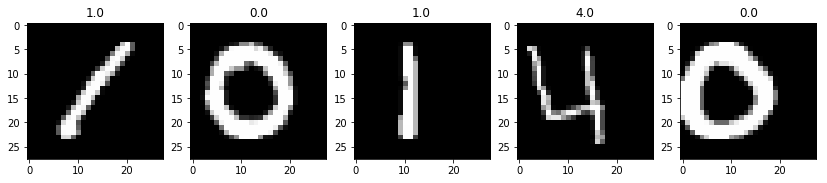

In [42]:
fig = plt.figure(figsize=(20, 10))
for i, img in enumerate(train_img[0:5], 1):
    subplot = fig.add_subplot(1, 7, i)
    plt.imshow(img, cmap='gray');
    subplot.set_title('%s' % train_label[i - 1]);

## Вычисляем X и Y составляющие градиента с помощью оператора Собеля

In [43]:
train_sobel_x = np.zeros_like(train_img)
train_sobel_y = np.zeros_like(train_img)
for i in range(len(train_img)):
    train_sobel_x[i] = cv2.Sobel(train_img[i], cv2.CV_64F, dx=1, dy=0, ksize=3)
    train_sobel_y[i] = cv2.Sobel(train_img[i], cv2.CV_64F, dx=0, dy=1, ksize=3)

In [44]:
test_sobel_x = np.zeros_like(test_img)
test_sobel_y = np.zeros_like(test_img)
for i in range(len(test_img)):
    test_sobel_x[i] = cv2.Sobel(test_img[i], cv2.CV_64F, dx=1, dy=0, ksize=3)
    test_sobel_y[i] = cv2.Sobel(test_img[i], cv2.CV_64F, dx=0, dy=1, ksize=3)

## Вычисляем угол и длину вектора градиента

In [45]:
train_g, train_theta = cv2.cartToPolar(train_sobel_x, train_sobel_y)

In [46]:
test_g, test_theta = cv2.cartToPolar(test_sobel_x, test_sobel_y)

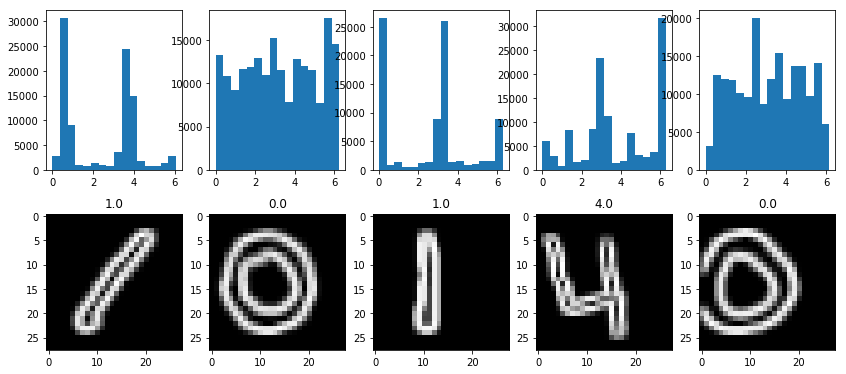

In [47]:
fig = plt.figure(figsize=(20, 10))
for i, img in enumerate(train_g[:5], 1):
    subplot = fig.add_subplot(1, 7, i)
    plt.imshow(img, cmap='gray');
    subplot.set_title('%s' % train_label[i - 1]);
    subplot = fig.add_subplot(3, 7, i)
    plt.hist(train_theta[i - 1].flatten(),
             bins=16, weights=train_g[i - 1].flatten())

## Вычисляем гистограммы градиентов

In [48]:
hist_count = 100

In [49]:
# Гистограммы вычисляются с учетом длины вектора градиента
train_hist = np.zeros((len(train_img), hist_count*8))
for i in range(len(train_img)):
    hist1, borders1 = np.histogram(train_theta[i][:13,:13],
                                 bins=hist_count,
                                 range=(0., 2. * np.pi),
                                 weights=train_g[i][:13,:13])
    hist2, borders2 = np.histogram(train_theta[i][:13,13:],
                                 bins=hist_count,
                                 range=(0., 2. * np.pi),
                                 weights=train_g[i][:13,13:])
    hist3, borders3 = np.histogram(train_theta[i][13:,:13],
                                 bins=hist_count,
                                 range=(0., 2. * np.pi),
                                 weights=train_g[i][13:,:13])
    hist4, borders4 = np.histogram(train_theta[i][:13,:13],
                                 bins=hist_count,
                                 range=(0., 2. * np.pi),
                                 weights=train_g[i][:13,:13])
    hist5, borders5 = np.histogram(train_theta[i][:,:7],
                                 bins=hist_count,
                                 range=(0., 2. * np.pi),
                                 weights=train_g[i][:,:7])
    hist6, borders6 = np.histogram(train_theta[i][:,7:13],
                                 bins=hist_count,
                                 range=(0., 2. * np.pi),
                                 weights=train_g[i][:,7:13])
    hist7, borders7 = np.histogram(train_theta[i][:,13:21],
                                 bins=hist_count,
                                 range=(0., 2. * np.pi),
                                 weights=train_g[i][:,13:21])
    hist8, borders8 = np.histogram(train_theta[i][:,21:],
                                 bins=hist_count,
                                 range=(0., 2. * np.pi),
                                 weights=train_g[i][:,21:])
    train_hist[i] = np.concatenate( (hist1,hist2,hist3,hist4,hist5,hist6,hist7,hist8), axis=0)

In [50]:
#Гистограммы вычисляются с учетом длины вектора градиента
test_hist = np.zeros((len(test_img), hist_count*8))
for i in range(len(test_img)):
    hist1, borders1 = np.histogram(test_theta[i][:13,:13],
                                 bins=hist_count,
                                 range=(0., 2. * np.pi),
                                 weights=test_g[i][:13,:13])
    hist2, borders2 = np.histogram(test_theta[i][:13,13:],
                                 bins=hist_count,
                                 range=(0., 2. * np.pi),
                                 weights=test_g[i][:13,13:])
    hist3, borders3 = np.histogram(test_theta[i][13:,:13],
                                 bins=hist_count,
                                 range=(0., 2. * np.pi),
                                 weights=test_g[i][13:,:13])
    hist4, borders4 = np.histogram(test_theta[i][:13,:13],
                                 bins=hist_count,
                                 range=(0., 2. * np.pi),
                                 weights=test_g[i][:13,:13])
    hist5, borders5 = np.histogram(test_theta[i][:,:7],
                                 bins=hist_count,
                                 range=(0., 2. * np.pi),
                                 weights=test_g[i][:,:7])
    hist6, borders6 = np.histogram(test_theta[i][:,7:13],
                                 bins=hist_count,
                                 range=(0., 2. * np.pi),
                                 weights=test_g[i][:,7:13])
    hist7, borders7 = np.histogram(test_theta[i][:,13:21],
                                 bins=hist_count,
                                 range=(0., 2. * np.pi),
                                 weights=test_g[i][:,13:21])
    hist8, borders8 = np.histogram(test_theta[i][:,21:],
                                 bins=hist_count,
                                 range=(0., 2. * np.pi),
                                 weights=test_g[i][:,21:])
    test_hist[i] = np.concatenate( (hist1,hist2,hist3,hist4,hist5,hist6,hist7,hist8), axis=0)

In [51]:
# train_hist = np.zeros((len(train_img), hist_count*4))
# for i in range(len(train_img)):
#     train_hist[i], borders = np.histogram(train_theta[i],
#                                  bins=hist_count*4,
#                                  range=(0., 2. * np.pi),
#                                  weights=train_g[i])

In [52]:
# test_hist = np.zeros((len(test_img), hist_count*4))
# for i in range(len(test_img)):
#     train_hist[i], borders = np.histogram(test_theta[i],
#                                  bins=hist_count*4,
#                                  range=(0., 2. * np.pi),
#                                  weights=test_g[i])

## Нормируем вектор гистограммы

In [53]:
# По умолчанию используется L2 норма
train_hist = train_hist / np.linalg.norm(train_hist, axis=1)[:, None]

In [54]:
test_hist = test_hist / np.linalg.norm(test_hist, axis=1)[:, None]

## Разбиваем выборку на обучение и валидацию

In [55]:
from sklearn.model_selection import train_test_split
#y_train, y_val, x_train, x_val = train_test_split(train_label, train_hist, test_size=0.2, random_state=42)
y_train, y_val, x_train, x_val = train_test_split(train_label, train, test_size=0.2, random_state=42)

## Собираем полносвязную сеть для обучения

In [56]:
x_train.shape

(33600, 784)

In [62]:
model = keras.models.Sequential()
n = x_train.shape[1]*2
model.add(keras.layers.Dense(n, input_dim=x_train.shape[1], activation='relu'))
model.add(keras.layers.Dense(n, activation='relu'))
model.add(keras.layers.Dense(n, activation='relu'))
#model.add(keras.layers.Dense(n, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## Выводим информацию о модели

In [63]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 1568)              1230880   
_________________________________________________________________
dense_14 (Dense)             (None, 1568)              2460192   
_________________________________________________________________
dense_15 (Dense)             (None, 1568)              2460192   
_________________________________________________________________
dense_16 (Dense)             (None, 10)                15690     
Total params: 6,166,954
Trainable params: 6,166,954
Non-trainable params: 0
_________________________________________________________________


## One hot encoding разметки

In [64]:
from keras.utils import np_utils
y_train_labels = np_utils.to_categorical(y_train)
print( y_train.shape, y_train_labels.shape, x_train.shape)

(33600,) (33600, 10) (33600, 784)


## Запускаем обучение

In [65]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [66]:
epochs_count = 100
for i in range(epochs_count):
    print('------ Epoch %s ------' % (i+1))
    model.fit(x_train, y_train_labels, batch_size=840, epochs=1)
    pred_val = model.predict_classes(x_val)
    print('Accuracy: %s' % accuracy_score(y_val, pred_val))

------ Epoch 1 ------
Epoch 1/1
8400/8400 [==============================] - 7s     
Accuracy: 0.099880952381
------ Epoch 2 ------
Epoch 1/1
8384/8400 [============================>.] - ETA: 0sAccuracy: 0.099880952381
------ Epoch 3 ------
Epoch 1/1
8384/8400 [============================>.] - ETA: 0sAccuracy: 0.099880952381
------ Epoch 4 ------
Epoch 1/1
8352/8400 [============================>.] - ETA: 0sAccuracy: 0.099880952381
------ Epoch 5 ------
Epoch 1/1
6784/8400 [=======================>......] - ETA: 1s

KeyboardInterrupt: 

In [ ]:
pred_val = model.predict_classes(x_val)
print('Accuracy: %s' % accuracy_score(y_val, pred_val))
print(classification_report(y_val, pred_val))
print(confusion_matrix(y_val, pred_val))

## Предсказания на тестовыйх данных

In [ ]:
predicted_test = model.predict_classes(test_hist)

In [ ]:
predicted_test[0:7]

In [ ]:
fig = plt.figure(figsize=(20, 10))
for i, img in enumerate(test_g[:7], 1):
    subplot = fig.add_subplot(1, 7, i)
    plt.imshow(img, cmap='gray');
    subplot.set_title('%s' % predicted_test[i - 1]);
    subplot = fig.add_subplot(3, 7, i)
    plt.hist(test_theta[i - 1].flatten(), bins=16, weights=test_g[i - 1].flatten())

In [ ]:
with open('submit.txt', 'w') as dst:
    dst.write('ImageId,Label\n')
    for i, p in enumerate(predicted_test, 1):
        dst.write('%s,%s\n' % (i, p))

max 0.96400